# Taxis Dataset Downloading and Processing

In [77]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import os
import kagglehub

**Data downloading from kagglehub:**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("crailtap/taxi-trajectory")

data = pd.read_csv(path + "/train.csv")

**Keeping a random subset of 50000 samples:**

In [46]:
random_state = 42

In [66]:
df = data.loc[data['MISSING_DATA'] == False].loc[data['POLYLINE'].apply(lambda x:len(x)) > 30]
df = df['POLYLINE']
df = df.sample(50000, random_state=random_state)
df = df.reset_index(drop=True)
df = df.apply(eval)

**Interpolation on trajectories points to keep the same number of values:**

In [68]:
n_points = 50

In [85]:
interp_traj = []
window = np.linspace(0, 1, n_points)

for i in range(len(df)):
    
    traj = np.array(df[i])
    x = traj[:,0]
    y = traj[:,1]

    t = np.linspace(0, 1, len(x))
    
    x = sp.interpolate.interp1d(t, x, kind='linear')(window)
    y = sp.interpolate.interp1d(t, y, kind='linear')(window)

    interp_traj.append(np.concatenate([x, y]))

traj_df = pd.DataFrame(np.array(interp_traj), columns = [f'x{i+1}' for i in range(n_points)] + [f'y{i+1}' for i in range(n_points)])

In [86]:
if not(os.path.exists('Data')):
    os.makedirs('Data')

traj_df.to_csv('Data/interp_taxis_df.csv', index=False)

**Visualisation:**

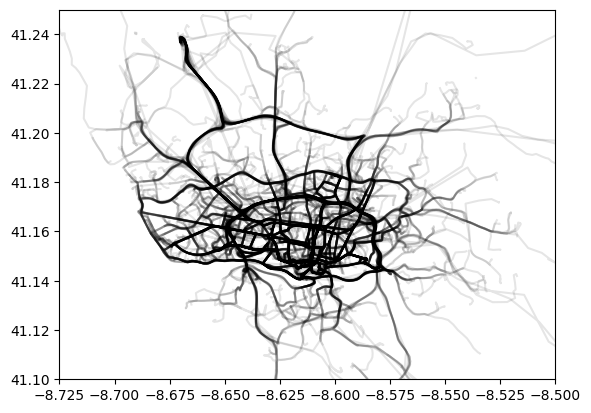

In [92]:
X = traj_df.iloc[:,:50].to_numpy()
Y = traj_df.iloc[:,50:].to_numpy()

for i in range(2000):
    plt.plot(X[i], Y[i], 'black', alpha=0.1)

plt.ylim(41.1, 41.25)
plt.xlim(-8.725, -8.5)

plt.show()